                            OLS Regression Results                            
Dep. Variable:                log_rer   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     172.6
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           1.43e-19
Time:                        13:41:10   Log-Likelihood:                -6.9976
No. Observations:                  64   AIC:                             18.00
Df Residuals:                      62   BIC:                             22.31
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.9726      0.517     15.430   

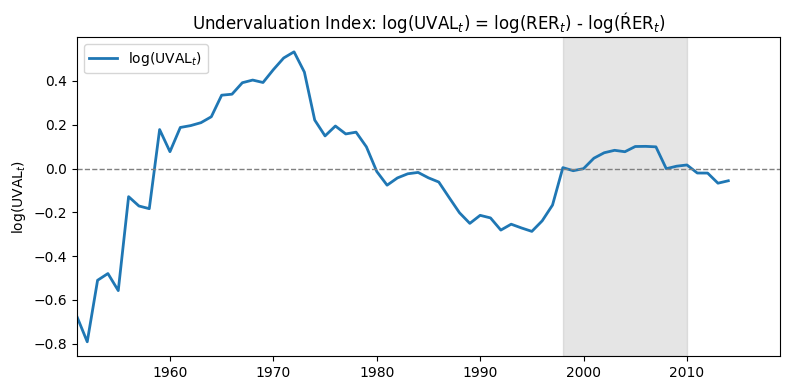

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# === 1. Load and prepare data ===
df = pd.read_stata("../data/raw/macro/pwt1001.dta")
tw = df.query("countrycode == 'TWN' & year.between(1951, 2014)").copy()
tw.loc[tw["pl_gdpo"] == 0, "pl_gdpo"] = np.nan

# === 2. Compute log(RER) and log(GDP per capita) ===
tw["log_rer"] = -np.log(tw["pl_gdpo"])  # or log(xr / ppp)
tw["log_rgdpo_pc"] = np.log(tw["rgdpo"] / tw["pop"])

# Drop missing values
tw = tw[np.isfinite(tw[["log_rer", "log_rgdpo_pc"]]).all(axis=1)].copy()

# === 3. Fit regression & predict log(RER) ===
X = sm.add_constant(tw["log_rgdpo_pc"])
y = tw["log_rer"]
ols = sm.OLS(y, X).fit(cov_type="HAC", cov_kwds={"maxlags": 1})
print(ols.summary())

tw["log_rer_hat"] = ols.predict(X)  # log(ŔER_t)
tw["log_uval"] = tw["log_rer"] - tw["log_rer_hat"]

# === 4. Plot: Rodrik undervaluation index ===
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tw["year"], tw["log_uval"], label="log(UVAL$_t$)", linewidth=2)
ax.axhline(0, linestyle="--", color="gray", linewidth=1)
ax.axvspan(1998, 2010, color="gray", alpha=0.2)
ax.set_title("Undervaluation Index: log(UVAL$_t$) = log(RER$_t$) - log(ŔER$_t$)", fontsize=12)
ax.set_ylabel("log(UVAL$_t$)")
ax.set_xlim(1951, 2019)
ax.legend()
plt.tight_layout()
plt.show()


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

pwt_df = pd.read_stata("../data/raw/pwt1001.dta")

id_vars = ['country', 'year']
pwt_df = pd.melt(pwt_df, id_vars=id_vars, var_name="variable", value_name="value")
pwt_df = pwt_df.rename(columns={'country': 'Country Name', 'year': 'Year'})
pwt_plgdpo = pwt_df[pwt_df['variable'] == 'pl_gdpo'][['Country Name', 'Year', 'value']].rename(columns={'value': 'pl_gdpo'})
pwt_rgdpo = pwt_df[pwt_df['variable'] == 'rgdpo'][['Country Name', 'Year', 'value']].rename(columns={'value': 'rgdpo'})
pwt_pop = pwt_df[pwt_df['variable'] == 'pop'][['Country Name', 'Year', 'value']].rename(columns={'value': 'pop'})
pwt_xr = pwt_df[pwt_df['variable'] == 'xr'][['Country Name', 'Year', 'value']].rename(columns={'value': 'xr'})